In [1]:
%config IPCompleter.greedy=True # Enable intellisense

In [2]:
import modules.oiplib as lib
from skimage import transform

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x1bc43e50>)

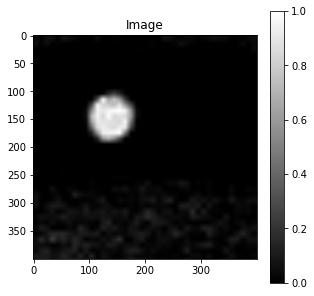

In [30]:
img = lib.loadImage("../images/clusters/cluster103.png")
img = lib.rgb2GrayLuminosity(img)
img = transform.rescale(img, 10)
# img = lib.threshold(img*255, 128)
lib.showImage(img, vmax=1)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x5550e50>)

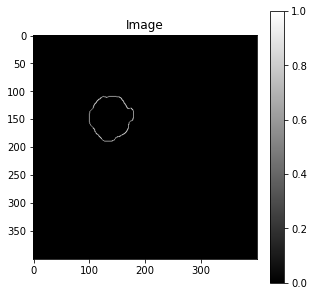

In [31]:
from skimage import feature

edges = feature.canny(img, sigma=2)
# edges, phi, x, y = lib.detect_edges(img)

lib.showImage(edges, vmax=1)

In [32]:
import numpy as np
import math

hough_radii = np.arange(30, 50, 1) # Since the radius should be from 3.5 to 4.5
# hough_radii = np.arange(0, 10, 0.1)

hough = transform.hough_circle(edges, hough_radii)

In [33]:
accumulator, x, y, radii = transform.hough_circle_peaks(hough, hough_radii, total_num_peaks=7)

(<Figure size 360x360 with 2 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x55aaad0>)

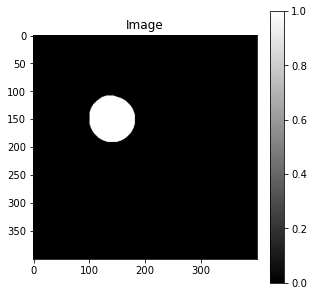

In [34]:
import matplotlib.pyplot as plt
from skimage import draw

result = np.zeros(img.shape)

for center_y, center_x, radius in zip(y, x, radii):
    circy, circx = draw.circle(center_y, center_x, radius,
                                    shape=img.shape)
    result[circy, circx] = 1

lib.showImage(result, vmax=1)

In [22]:
def radiiToSize(radii):
    return radii * 2 * 8.2

In [ ]:
radiiToSize(np.average(radii)/10)